# Modeling and Forecasting of monthly total count of crime code-624 occurred 

# Name : Apoorva Kumar

In [332]:
'Check the working directory'

import os
os.getcwd()

'/Users/apoorvgowda/Documents/My Taxi'

In [333]:
'Setting the working directory'
os.chdir('/Users/apoorvgowda/Documents/My Taxi')

**Note** : Please change it to your working directory

In [334]:
os.getcwd()

'/Users/apoorvgowda/Documents/My Taxi'

In [335]:
'Importing the libraries'
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [336]:
'Importing the dataset'

dataset = pd.read_csv('Crime_Data_from_2010_to_Present.csv')

In [337]:
'Displaying the first 3 rows of the data'

pd.set_option('display.max_columns', 50)
dataset.head(3)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,11401303,09/13/2010,09/12/2010,45,14,Pacific,1485,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,"(33.9599, -118.3962)"
1,70309629,08/09/2010,08/09/2010,1515,13,Newton,1324,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,"(34.0224, -118.2524)"
2,100100508,01/08/2010,01/07/2010,2005,1,Central,182,330,BURGLARY FROM VEHICLE,0344,46,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,"(34.0389, -118.2643)"


In [338]:
'Displaying the last 3 rows of the data'

pd.set_option('display.max_columns', 50)
dataset.tail(3)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
1967973,101200721,05/21/2010,05/20/2010,2300,12,77th Street,1245,121,"RAPE, FORCIBLE",0342 0503 0537 0527 1206 1251 1259 1309 1415 1822,17,F,W,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,121.0,NaN,NaN,NaN,69TH ST,DENKER AV,"(33.977, -118.3046)"
1967974,191005089,01/26/2019,01/01/2010,1000,10,West Valley,1029,354,THEFT OF IDENTITY,1822 0377,51,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,7000 WOODLEY AV,NaN,"(34.1976, -118.4837)"
1967975,191505220,01/24/2019,01/05/2010,700,15,N Hollywood,1555,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1202 0701,72,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,341.0,NaN,NaN,NaN,5000 LANKERSHIM BL,NaN,"(34.1611, -118.3723)"


In [339]:
'Displaying the column names'

dataset.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [340]:
'Dimension of the dataset'

dataset.shape

(1967976, 26)

Dataset has 1967976 records and 26 features or variables.

In [341]:
'Typecasting the date features to type Datatime'

dataset['Date Occurred'] = pd.to_datetime(dataset['Date Occurred'])
dataset['Date Reported'] = pd.to_datetime(dataset['Date Reported'])

In [342]:
'Sorting the dataset by Data Occurred'

dataset = dataset.sort_values(by='Date Occurred')

# Data Selection and Preprocessing based on requirement (Crime code = 624)

Only the data samples with Cime Code = 624 are selected for further analysis

In [343]:
dataset_624 = dataset.loc[dataset['Crime Code'] == 624]

In [344]:
'Sorting the dataset by Date Occurred'
dataset_624 = dataset_624.sort_values(by='Date Occurred')

In [345]:
dataset_624.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178115 entries, 62707 to 1219163
Data columns (total 26 columns):
DR Number                 178115 non-null int64
Date Reported             178115 non-null datetime64[ns]
Date Occurred             178115 non-null datetime64[ns]
Time Occurred             178115 non-null int64
Area ID                   178115 non-null int64
Area Name                 178115 non-null object
Reporting District        178115 non-null int64
Crime Code                178115 non-null int64
Crime Code Description    178115 non-null object
MO Codes                  176842 non-null object
Victim Age                178115 non-null int64
Victim Sex                176353 non-null object
Victim Descent            176351 non-null object
Premise Code              178113 non-null float64
Premise Description       178110 non-null object
Weapon Used Code          177181 non-null float64
Weapon Description        177181 non-null object
Status Code               178115 non-nu

In [346]:
'Check for missing values'

dataset_624.isnull().any()

DR Number                 False
Date Reported             False
Date Occurred             False
Time Occurred             False
Area ID                   False
Area Name                 False
Reporting District        False
Crime Code                False
Crime Code Description    False
MO Codes                   True
Victim Age                False
Victim Sex                 True
Victim Descent             True
Premise Code               True
Premise Description        True
Weapon Used Code           True
Weapon Description         True
Status Code               False
Status Description        False
Crime Code 1               True
Crime Code 2               True
Crime Code 3               True
Crime Code 4               True
Address                   False
Cross Street               True
Location                  False
dtype: bool

In [347]:
'Counting the missing values'
dataset_624.isnull().sum()

DR Number                      0
Date Reported                  0
Date Occurred                  0
Time Occurred                  0
Area ID                        0
Area Name                      0
Reporting District             0
Crime Code                     0
Crime Code Description         0
MO Codes                    1273
Victim Age                     0
Victim Sex                  1762
Victim Descent              1764
Premise Code                   2
Premise Description            5
Weapon Used Code             934
Weapon Description           934
Status Code                    0
Status Description             0
Crime Code 1                   1
Crime Code 2              174190
Crime Code 3              178063
Crime Code 4              178114
Address                        0
Cross Street              139287
Location                       0
dtype: int64

**There are missing values. But we are interested in features 'Date Occurred' and 'Crime Code'. There are no missing values in these two features**.

In [348]:
'Dimension of the dataset where crime code = 624'

dataset_624.shape

(178115, 26)

In [349]:
'Extracting the year from the Date Occurred'

dataset_624['Year'] = dataset_624['Date Occurred'].dt.year

In [350]:
'Displaying the years of the dataset'

dataset_624['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [351]:
'Extracting the month from the Date Occurred'

dataset_624['month'] = dataset_624['Date Occurred'].dt.month

In [352]:
'Displaying the month of the dataset'

dataset_624['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [353]:
'Combining the month and the year'

dataset_624['Year_and_month'] = list(zip(dataset_624['Year'], dataset_624['month']))

In [354]:
'Displaying the first 10 records of the Year_and_month feature'

dataset_624['Year_and_month'][0:10,]

62707      (2010, 1)
1675579    (2010, 1)
1675581    (2010, 1)
1676434    (2010, 1)
1687231    (2010, 1)
1687232    (2010, 1)
1687236    (2010, 1)
1657455    (2010, 1)
1648161    (2010, 1)
1667862    (2010, 1)
Name: Year_and_month, dtype: object

In [355]:
'Splitting training data and test data '

Training_data = dataset_624[(dataset_624['Date Occurred'] <= '2018/12/31')]
Test_Data = dataset_624[(dataset_624['Date Occurred'] > '2018/12/31')]

1) Data samples corresponing to date occurred before 31st December 2018 are chosen as Training data.

2) Data samples corresponing to date occurred after 31st December 2018 are chosen as Test data.

# Data aggregation to select the total counts of 'crime 624' occured groupby month and year

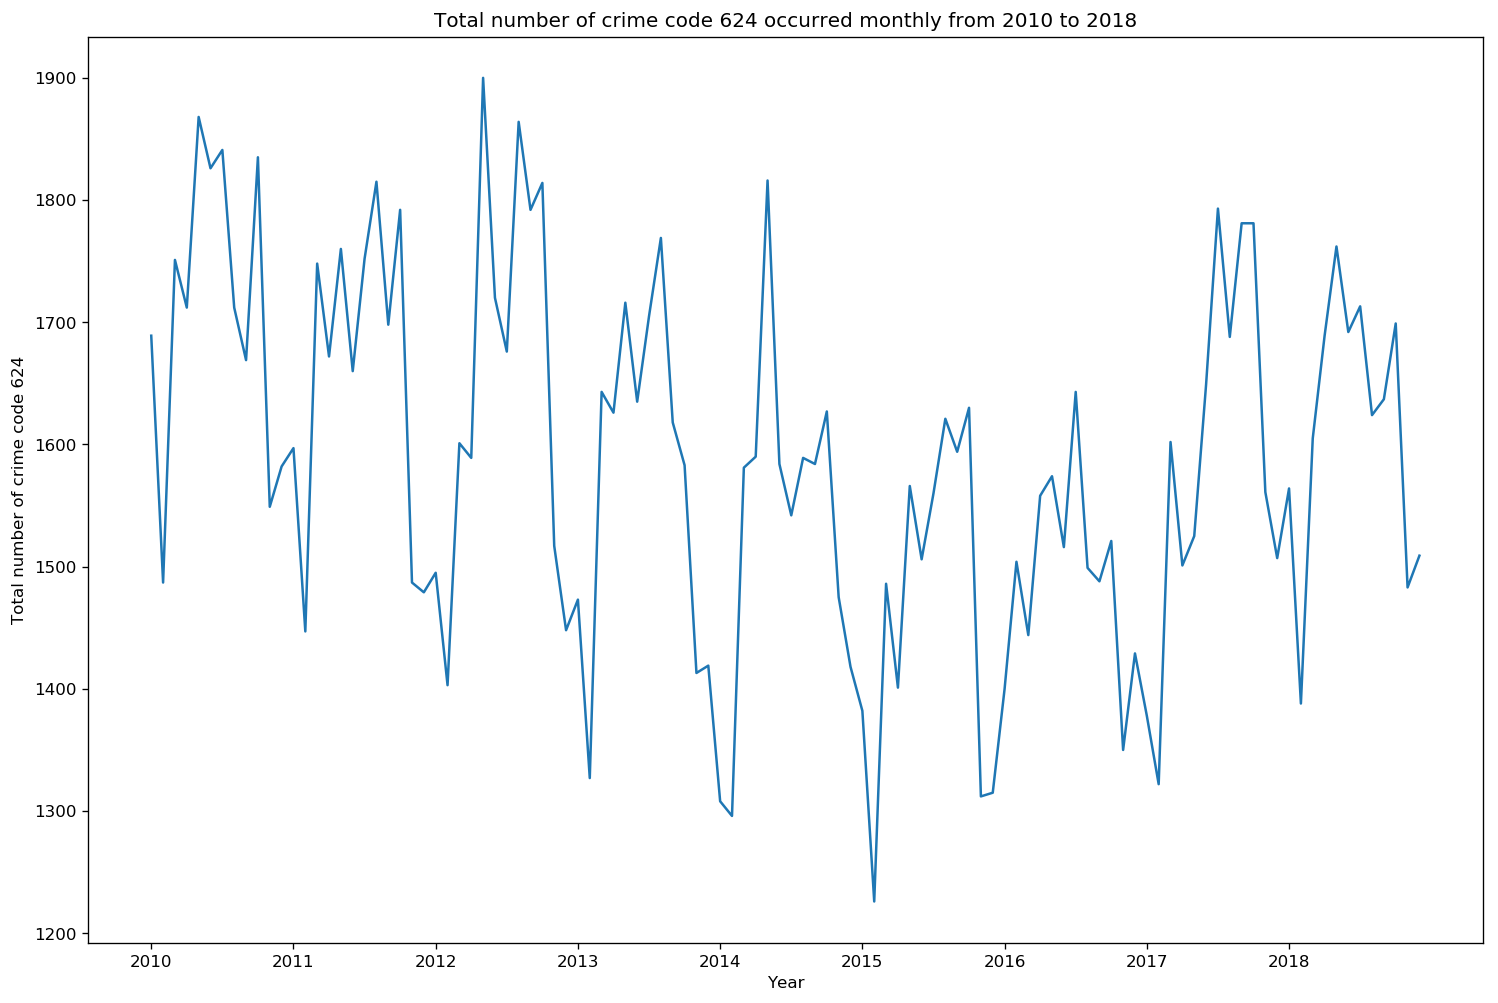

In [356]:
Training_data_Y_and_M = Training_data.groupby('Year_and_month').count()['Crime Code']
Test_data_Y_and_M = Test_Data.groupby('Year_and_month').count()['Crime Code']

plt.figure(figsize=(15,10))
plt.plot(Training_data_Y_and_M.values)
plt.xticks([i * 12 for i in range(9)], ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017','2018'))
plt.xlabel('Year')
plt.ylabel('Total number of crime code 624')
plt.title('Total number of crime code 624 occurred monthly from 2010 to 2018')
plt.show()

**Observation:**

From the above plot we can observe that,

 1) There is a trend and seasonality in the total count of crime code 624 distribution monthly.
 
 2) There is a sharp dip in the count in 2015 January and February. 
 
 3) Total count is less between the years 2015 and 2017.

Text(0, 0.5, 'Total count')

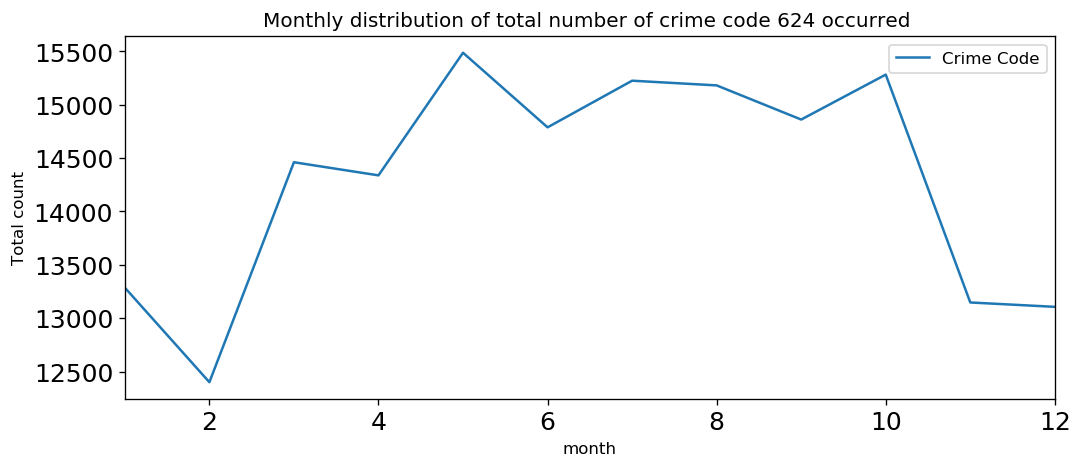

In [365]:
'Monthly distribution of total number of crime code 624 occurred'

Training_data.groupby('month').count().plot(y='Crime Code', kind='line',
                                    figsize = (10,4), fontsize= 15)
                                    
plt.title('Monthly distribution of total number of crime code 624 occurred ')
plt.ylabel('Total count')

**Observation:**

    1) Least total count is in the month of February
    
    2) Maximum count is in the month of May

Text(0.5, 1.0, 'Distribution of total count of crime code 624')

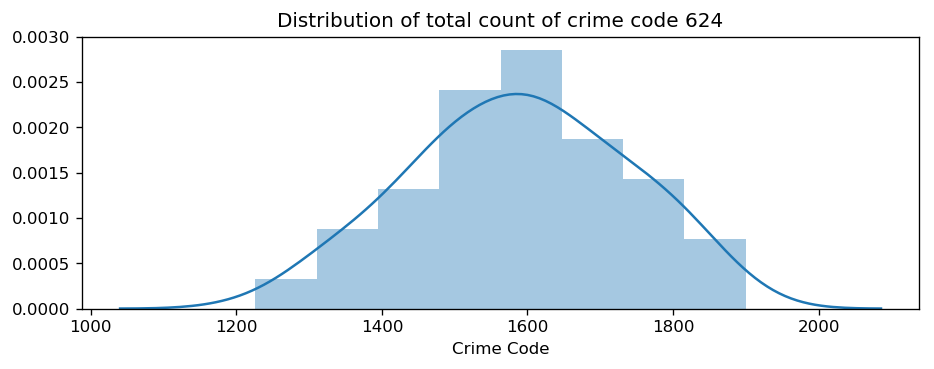

In [315]:
'Histogram of total count monthly'

sns.distplot(Training_data_Y_and_M, hist = True)
plt.title('Distribution of total count of crime code 624')

**Above figure is the histogram of the monthly count of crime code 624. Maximum values of count is distributed in the range of 1500 to 1700 and peak at 1600**.

Text(0.5, 1.0, 'Box plot of monthly total count of crime code 624')

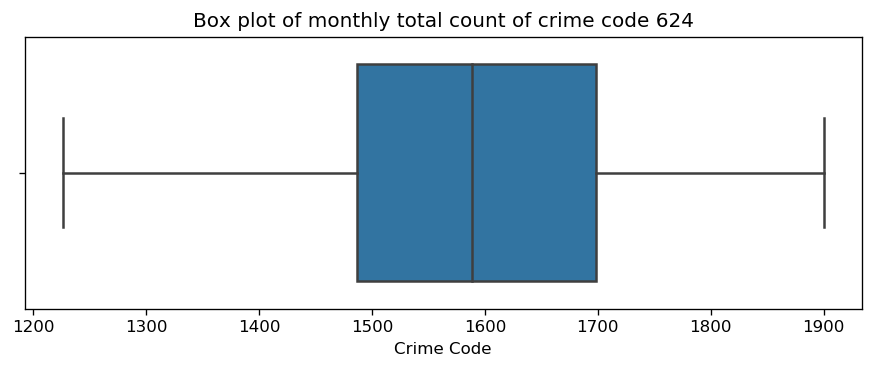

In [317]:
'Box plot of Count'
sns.boxplot(Training_data_Y_and_M)
plt.title('Box plot of monthly total count of crime code 624')

**From the above box plot we can conclude that there no outliers**.

# ARIMA Model to fit the timeseries and forecasting

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

**Check for Stationary**:

1) The series needs to be stationary to use this in ARIMA model.

2) Stationary time series is when the mean and variance are constant over time. It is easier to predict when the series is stationary.

3) If the series is not stationary, we can make it stationary by 1st order or 2nd order differencing. ARIMA model has a hyperparameter 'd' for time series differencing.

4) If d = 1, then 1st order differencing and d = 2 for 2nd order differencing.

In [155]:
'Stationary check'

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(Training_data_Y_and_M.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.597593
p-value: 0.484802


1) p_value is greater than significance level (0.05) . Hence series is not stationary. So we can reject Null Hypothesis and apply first difference.


In [50]:
'1st Differencing'

result = adfuller(Training_data_Y_and_M.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.928148
p-value: 0.000031



1) Now the series is stationary as P-value is less than 0.05 after 1st order differencing. So we can use 'd' = 1 in the ARIMA model.

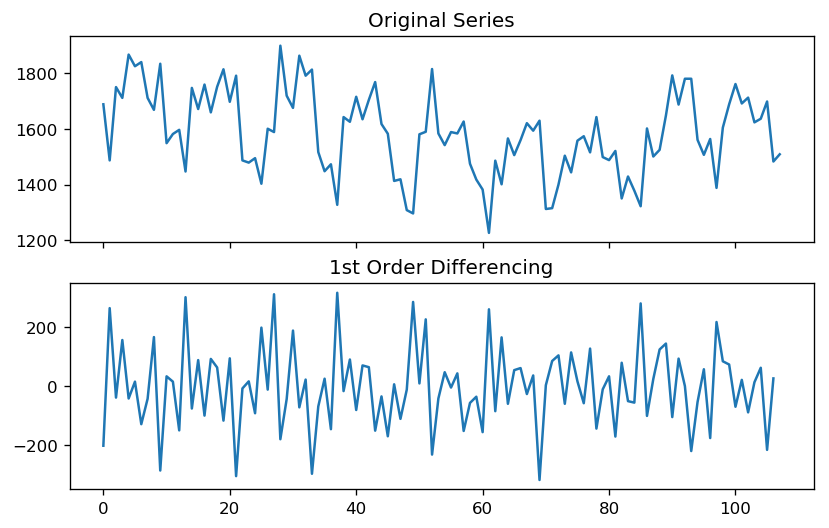

In [150]:
'Plotting the Original series and 1st order difference'

plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(Training_data_Y_and_M.values); axes[0].set_title('Original Series')

# 1st Differencing
Training_data_Y_and_M_diff = Training_data_Y_and_M.diff().dropna()
axes[1].plot(Training_data_Y_and_M_diff.values); axes[1].set_title('1st Order Differencing')

plt.show()



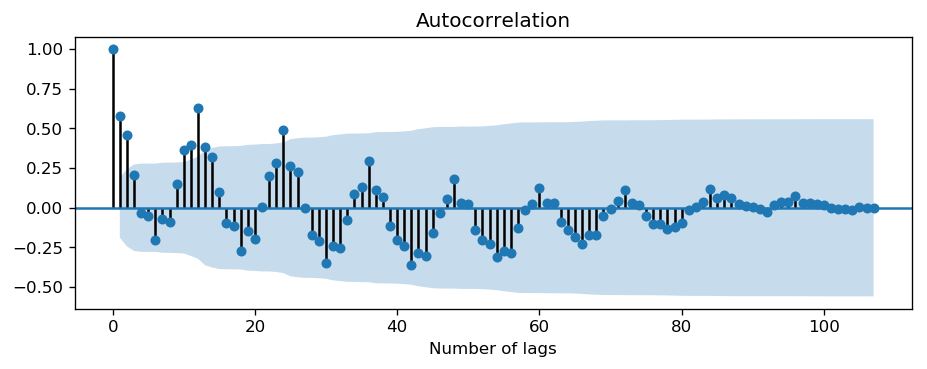

In [367]:
'AutoCorelation plot'
plot_acf(Training_data_Y_and_M)
plt.xlabel('Number of lags')
plt.show()


**From the above Auto Correlation plot we can observe that the autocorrelation is high after every 12 lag features (12 months of the year). This indicates that this is yearly seasonal data and there is a perioidicity**. 

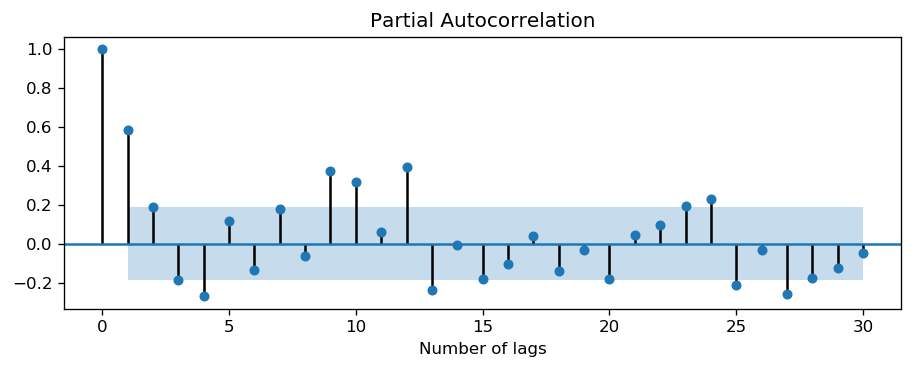

In [369]:
'Partial autocorrelation plot'

plot_pacf(Training_data_Y_and_M.values, lags = 30)
plt.xlabel('Number of lags')
plt.show()



1) Partial autocorrelation plot helps us to identify the AR term (p) of the ARIMA model. 

2) We can observe that the lag 12 also has the correlation greater than the significance line.

3) So we cannot actually deduce one single optimum value of 'p' from this plot.

4) So I have performed grid search below to identify the optimum values of ARIMA parameters.

In [303]:
'Grid search to find optimum parameter values for ARIMA model'

def evaluate_arima_model(X, arima_order):
    # Split train and test dataset
    train_size = int(len(X) * 0.8)
    train, test = Training_data_Y_and_M[:-12, ], Training_data_Y_and_M[-12:]
    history = [x for x in train]
    # Predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    'Calculate MAE error'
    error = mean_absolute_error(test, predictions)
    return error
 

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mae = evaluate_arima_model(dataset, order)
                    if mae < best_score:
                        best_score, best_cfg = mae, order
                    print('ARIMA%s MAE=%.3f' % (order,mae))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
'Parameter Difinition'
p_values = [0, 1,4,6, 12]
d_values = [1]
q_values = [0,1]
warnings.filterwarnings("ignore")
evaluate_models(Training_data_Y_and_M.values, p_values, d_values, q_values)

ARIMA(0, 1, 1) MAE=87.388
ARIMA(1, 1, 0) MAE=90.264
ARIMA(1, 1, 1) MAE=91.058
ARIMA(4, 1, 0) MAE=95.497
ARIMA(4, 1, 1) MAE=100.602
ARIMA(6, 1, 0) MAE=107.685
ARIMA(6, 1, 1) MAE=110.439
ARIMA(12, 1, 0) MAE=73.359
Best ARIMA(12, 1, 0) MSE=73.359


**As per the above grid search, Best ARIMA model has order (12,1,0) with mean absolute error of 73.35**

In [253]:
'Assigning the data samples corresponds to year 2018 as validation data to evaluate the model'

Training_data = Training_data_Y_and_M[:-12, ]
Validation_data = Training_data_Y_and_M[-12:]

In [254]:
'Model training using the optimum parameter values from the grid search'

model = ARIMA(Training_data.values, order=(12,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   95
Model:                ARIMA(12, 1, 0)   Log Likelihood                -562.555
Method:                       css-mle   S.D. of innovations             87.253
Date:                Thu, 23 May 2019   AIC                           1153.109
Time:                        17:28:13   BIC                           1188.863
Sample:                             1   HQIC                          1167.557
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4105      1.738     -0.812      0.419      -4.817       1.996
ar.L1.D.y     -0.5293      0.103     -5.155      0.000      -0.731      -0.328
ar.L2.D.y     -0.4105      0.113     -3.636      0.0

1) The p-values of all the coefficients is within or close to the significant value (0.05)

2) Hence we can assume that the optimum AR term (p) of the ARIMA model is 12

# ARIMA Model Forecasting

In [255]:
' Model Forecasting'

yhat = model_fit.forecast(steps = 17)[0]
print(yhat)

[1446.29993944 1393.33518498 1507.42614907 1490.60381381 1536.80416369
 1606.93903008 1711.59633879 1696.18127954 1720.4415788  1710.91021465
 1560.11707861 1528.52078477 1470.51273988 1427.74621277 1476.40294025
 1475.81955059 1529.56902948]


 I have chosen steps = 17 because, each step corresponds to 1 month of the year. So 12 months from 2018 (Validation data) and 5 months from 2019 (Test data).

Text(0.5, 1.0, 'Actual count vs Forecasted count of Validation data (Year 2018)')

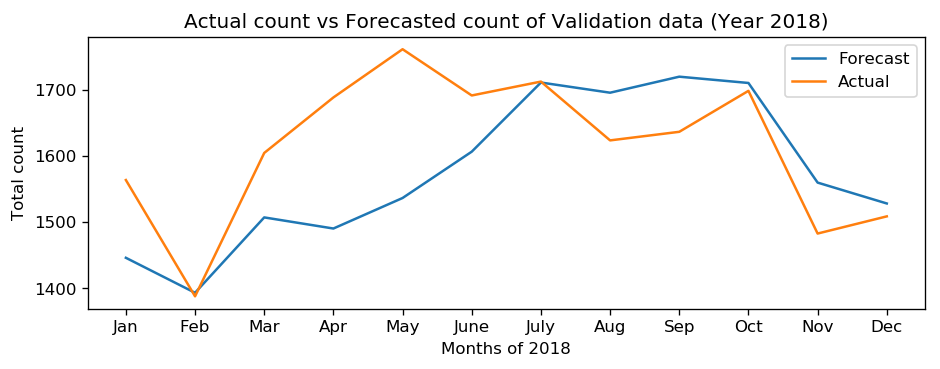

In [301]:
'Actual vs Prediction plot of validation data'

plt.plot(yhat[:-5,], label = 'Forecast')
plt.plot(Validation_data.values, label = 'Actual')
plt.xticks([i * 1 for i in range(12)], ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
                                        'Sep','Oct','Nov','Dec'))
plt.xlabel('Months of 2018')
plt.ylabel('Total count')
plt.legend()
plt.title('Actual count vs Forecasted count of Validation data (Year 2018)')

**We can observe that the model failed to forecast few counts accurately. It needs to be further optimized.**

Text(0.5, 1.0, 'Actual count vs Forecasted count of Test data (Year 2019)')

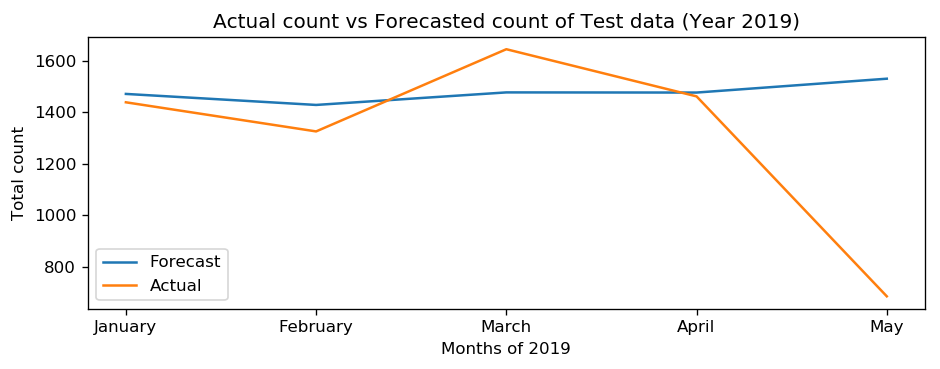

In [276]:
'Actual vs Prediction plot of test data'

plt.plot(yhat[-5:,], label = 'Forecast')
plt.plot(Test_data_Y_and_M.values, label = 'Actual')
plt.xticks([i * 1 for i in range(5)], ('January', 'February', 'March', 'April', 'May'))
plt.xlabel('Months of 2019')
plt.ylabel('Total count')
plt.legend()
plt.title('Actual count vs Forecasted count of Test data (Year 2019)')

**Observation:**

 1) Model forecast for the months January, February and April are quite accurate
 
 2) Model forecast for March could be improved
 
 **3) Interesting fact is that the model completely failed to forecast the count for the month May. This is due to the lack of data availability for the month May (May is still running). And we can consider count of May as outlier and we can ignore it**

In [304]:
'Mean Absolute Error for validation and test data of ARIMA model (Ignoring the count of May for test data)'

from sklearn.metrics import mean_absolute_error
prediction = yhat[-5:,]
prediction_ignore_May = prediction[:-1,]
mae_arima_validation = mean_absolute_error(Validation_data.values, yhat[:-5,])
mae_arima_test = mean_absolute_error(Test_data_Y_and_M.values[:-1,], prediction_ignore_May)
print('MAE of the validation data for ARIMA model :',mae_arima_validation)
print('MAE of the test data for ARIMA model :',mae_arima_test)

MAE of the validation data for ARIMA model : 82.9030572058817
MAE of the test data for ARIMA model : 79.4188907494335


# SARIMA (Seasonal ARIMA) model to fit the timeseries and forecasting

1) The problem with ARIMA model is that it fails to consider the seasonality of the timeseries

2) From the monthly distribution plot of total count of crime code 624, we can observe that there is a yearly periodicity (seasonality) in the series

3) Hence I have used SARIMA model to improve the forecast accuracy

4) SARIMA model has extra paramters called seasonal parameters (P, D, Q ,M) where 'M' is the periodicity or seasonality parameter.

5) Since the total count series is yearly seasonal, I have used M = 12


In [309]:
'SARIMA Model to include the seasonality of the timeseries'

from statsmodels.tsa.statespace.sarimax import SARIMAX

model_SARIMA = SARIMAX(Training_data.values, order=(12,0,0), seasonal_order=(1,1,1,12))
model_SARIMA = model_SARIMA.fit(disp=0)


# SARIMA model forecast

In [310]:
yhat_new = model_SARIMA.forecast(steps = 17)
print(yhat)

[1446.29993944 1393.33518498 1507.42614907 1490.60381381 1536.80416369
 1606.93903008 1711.59633879 1696.18127954 1720.4415788  1710.91021465
 1560.11707861 1528.52078477 1470.51273988 1427.74621277 1476.40294025
 1475.81955059 1529.56902948]


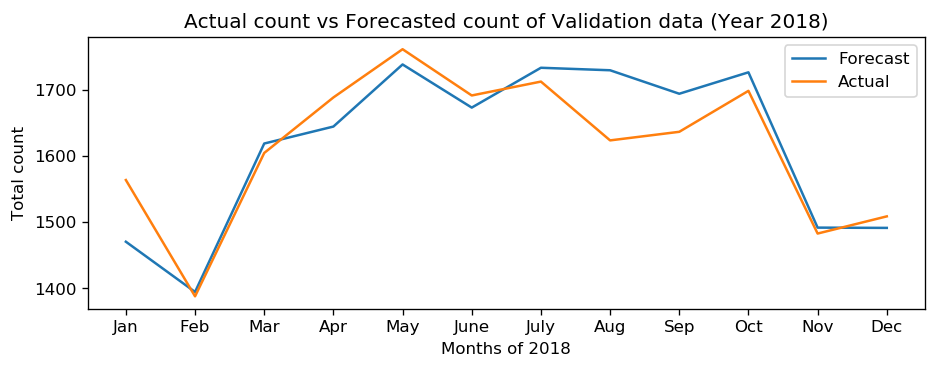

In [311]:
plt.plot(yhat_new[:-5,], label = 'Forecast')
plt.plot(Validation_data.values, label = 'Actual')
plt.xticks([i * 1 for i in range(12)], ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
                                        'Sep','Oct','Nov','Dec'))
plt.xlabel('Months of 2018')
plt.ylabel('Total count')
plt.title('Actual count vs Forecasted count of Validation data (Year 2018)')
plt.legend()

**Observation:**

SARIMA model forecast is more accurate than ARIMA model.

Text(0.5, 1.0, 'Actual count vs Forecasted count of Test data (Year 2019)')

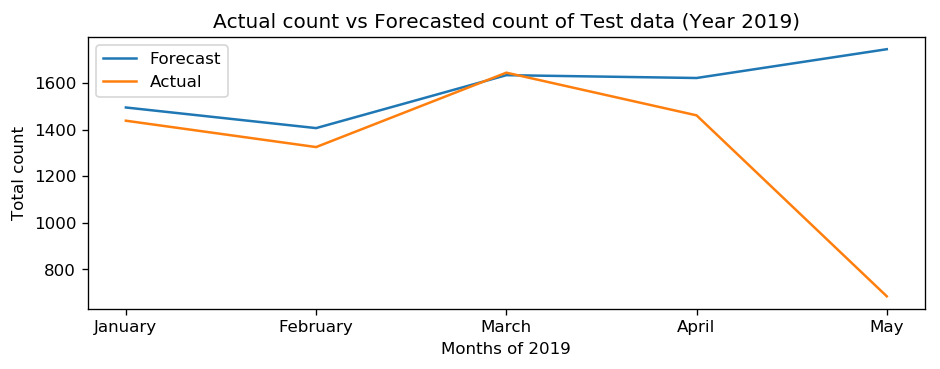

In [320]:
plt.plot(yhat_new[-5:,], label = 'Forecast')
plt.plot(Test_data_Y_and_M.values, label = 'Actual')
plt.xticks([i * 1 for i in range(5)], ('January', 'February', 'March', 'April', 'May'))
plt.xlabel('Months of 2019')
plt.ylabel('Total count')
plt.legend()
plt.title('Actual count vs Forecasted count of Test data (Year 2019)')


**Observation:**

 1) Model forecast for the months January, February and March are quite accurate
 
 2) Model forecast for April could be improved
 
 **3) The model completely failed to forecast the count for the month May. This is due to the lack of data availability for the month May (May is still running). And we can consider count of May as outlier and we can ignore it**

In [313]:
'Mean Absolute Error for validation and test data of SARIMA model (Ignoring the count of May for test data)'

prediction_sarima = yhat_new[-5:,]
prediction_sarima_ignore_May = prediction_sarima[:-1,]
mae_sarima_validation = mean_absolute_error(Validation_data.values, yhat_new[:-5,])
mae_sarima_test = mean_absolute_error(Test_data_Y_and_M.values[:-1,], prediction_sarima_ignore_May)
print('MAE of the validation data for SARIMA model :',mae_sarima_validation)
print('MAE of the test data for SARIMA model :',mae_sarima_test)


MAE of the validation data for SARIMA model : 36.56948819259467
MAE of the test data for SARIMA model : 77.20815681887751


# ARIMA and SARIMA model comparison



| Model |  MAE Validation data  |  MAE Test data |
| ----  | ---- |---- |
| ARIMA |  82.90 |79.41 |
| SARIMA |  36.56|77.20|

   **Observation** : Significant decrease in Mean absolute error (MAE) of validation data for SARIMA model.


In [371]:
'Printing Actual and Predicted for test data'

print('Actual',Test_data_Y_and_M.values[:-1,])
print('Prediction',prediction_sarima_ignore_May)

Actual [1438 1325 1644 1461]
Prediction [1494.70367418 1406.28401202 1633.30329831 1621.14823937]


# Evaluation table

| Month |  Predicted  |  Actual | Evaluation (Absolute error)|
| ---  | --- |--- |--- |
| 01/2019 |  1494.7 |1438 | 56.7 |
| 02/2019 |  1406.2|1325|81.2 |
| 03/2019 |  1633.3|1644 |10.7 |
| 04/2019 |  1621.1|1461|160.1 |
